In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [34]:
def f(x):
    return (x**4+4*x**3-12*x**2+1)
x=[i for i in np.arange(-0.5,0, 0.01)]
f1=[]
for i in np.arange(-0.5,0, 0.01):
    f1.append(f(i))


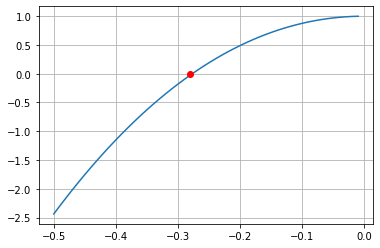

In [33]:
plt.plot(x,f1)
plt.plot(-0.28,0,'o',color='r')
plt.grid()


In [16]:
def dfdx(x):
    return (4*x**3+12*x**2-24*x)

x=[i for i in np.arange(-0.5,0, 0.01)]
f2=[]
for i in np.arange(-2,1, 0.01):
    f2.append(dfdx(i))

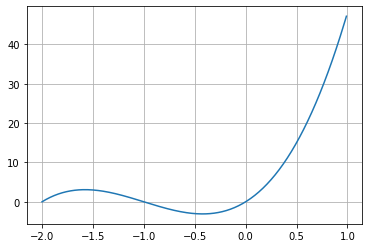

In [17]:
plt.plot(x,f2)
plt.grid()

In [39]:
i=-0.5
j=0
while f(i)*f(j)<0 and dfdx(i)*dfdx(j)>=0:
    i+=0.00001
    j-=0.00001
    
print(round(i,3),round(j,3))

E=0.0001
a=-0.5
b=0
n=0
while((f(a)*f(b))<0):
    a+=0.1
    b+=0.1
    n+=1
print(" корень лежит на отрезке: [{0},{1}];iter={2}".format(a,b,n))



-0.277 -0.223
 корень лежит на отрезке: [-0.20000000000000004,0.30000000000000004];iter=3


In [35]:
def md(a,b):
    iter=0
    while abs(b-a)>E:
        c=(a+b)/2
        if f(c)==0:
            break
        if f(a)*f(c)<0:
            b=c
        else:
            a=c
        iter+=1    
        x=(a+b)/2
    print("iter=",iter)
    print("x=",x)
    print("f(x)=",f(x))

In [36]:
a, b = -0.5, 0
md(a,b)

iter= 13
x= -0.277008056640625
f(x)= 6.331273479154298e-05


In [37]:
def mh(a,b):
    iter=0
    x1=a-f(a)*(b-a)/(f(b)-f(a))
    if f(a)*f(x1)<0:
        b=x1
    else:
        a=x1
    x2=a-f(a)*(b-a)/(f(b)-f(a))
    while abs(x2 - x1)>E:
        if f(x2)==0:
            break
        if f(a)*f(x2)<0:
            b=x2
        else:
            a=x2
        x1=x2
        x2=a-f(a)*(b-a)/(f(b)-f(a))
        iter += 1
    print("x =",x2)
    print("f(x) =",f(x2)) 
    print("число итераций:",iter)

In [38]:
mh(a,b)

x = -0.2769996651981146
f(x) = 0.00012611300700715589
число итераций: 7


In [40]:
def ff(x):
    return np.exp(-2*x)+2-(5**x)
def dffdx(x):
    return -5**x*np.log(5)-2*np.exp(-2*x)

In [45]:
E=0.0001
def mn(x):
    iter=0
    x1=x
    x2=x1-ff(x1)/dffdx(x1)
    while abs(ff(x2))>E:
        x1=x2
        x2=x1-ff(x1)/dffdx(x1)
        iter+=1
        
    print('iter: ', iter)
    print('x=', x2)
    print('f(x)=', ff(x2))


In [46]:
mn(0)

iter:  2
x= 0.5299496140550224
f(x)= -2.2749234851460187e-07


In [48]:
def f1(x,y):
    return x**2+y**2-9
def f2(x,y):
    return y-np.exp(-x)-1
def f11(x):
    return 2*x
def f12(y):
    return 2*y
def f21(x):
    return -np.exp(-x)
def f22(y):
    return 1
def W(x):
    return np.array([[f11(x[0]),f12(x[1])],[f21(x[0]),f22(x[1])]])
def F(x):
    return np.array([f1(x[0],x[1]),f2(x[0],x[1])])

In [49]:

def mn_syst(x,E):
    iter=0
    x1=x    
    x2=x1-(np.dot(np.linalg.inv(W(x1)),F(x1)))
    while (abs(x2[0]-x1[0])>E and abs(x2[1]-x1[1])>E):
        x1=x2
        x2=x1-(np.dot(np.linalg.inv(W(x1)),F(x1)))
        iter+=1
    print("iter=",iter)
    print("X=",x2)
    print("F(x)=",F(x2))

In [51]:
mn_syst([-0.5,2],E)

iter= 7
X= [2.80633456 1.06041802]
F(x)= [ 3.35882415e-08 -8.05257592e-06]
